In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import opendatasets as od

In [3]:
from getpass import getpass
import os, json
from pathlib import Path

username = input("Kaggle username: ").strip()
key = getpass("Kaggle API key (hidden): ").strip()

# Set env vars for the running kernel
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = key

# Also write kaggle.json for opendatasets/kaggle CLI
kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(parents=True, exist_ok=True)
kaggle_file = kaggle_dir / "kaggle.json"
kaggle_file.write_text(json.dumps({"username": username, "key": key}))
kaggle_file.chmod(0o600)

print("Kaggle credentials set in environment and saved to ~/.kaggle/kaggle.json")

Kaggle credentials set in environment and saved to ~/.kaggle/kaggle.json


In [4]:
od.download('https://www.kaggle.com/datasets/sameerk2004/space-missions-dataset')

Skipping, found downloaded files in "./space-missions-dataset" (use force=True to force download)


In [5]:
space_data = pd.read_csv("/workspaces/up2107120-ACT-CW2-repo/space-missions-dataset/space_missions_dataset.csv")
display(space_data.head())

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


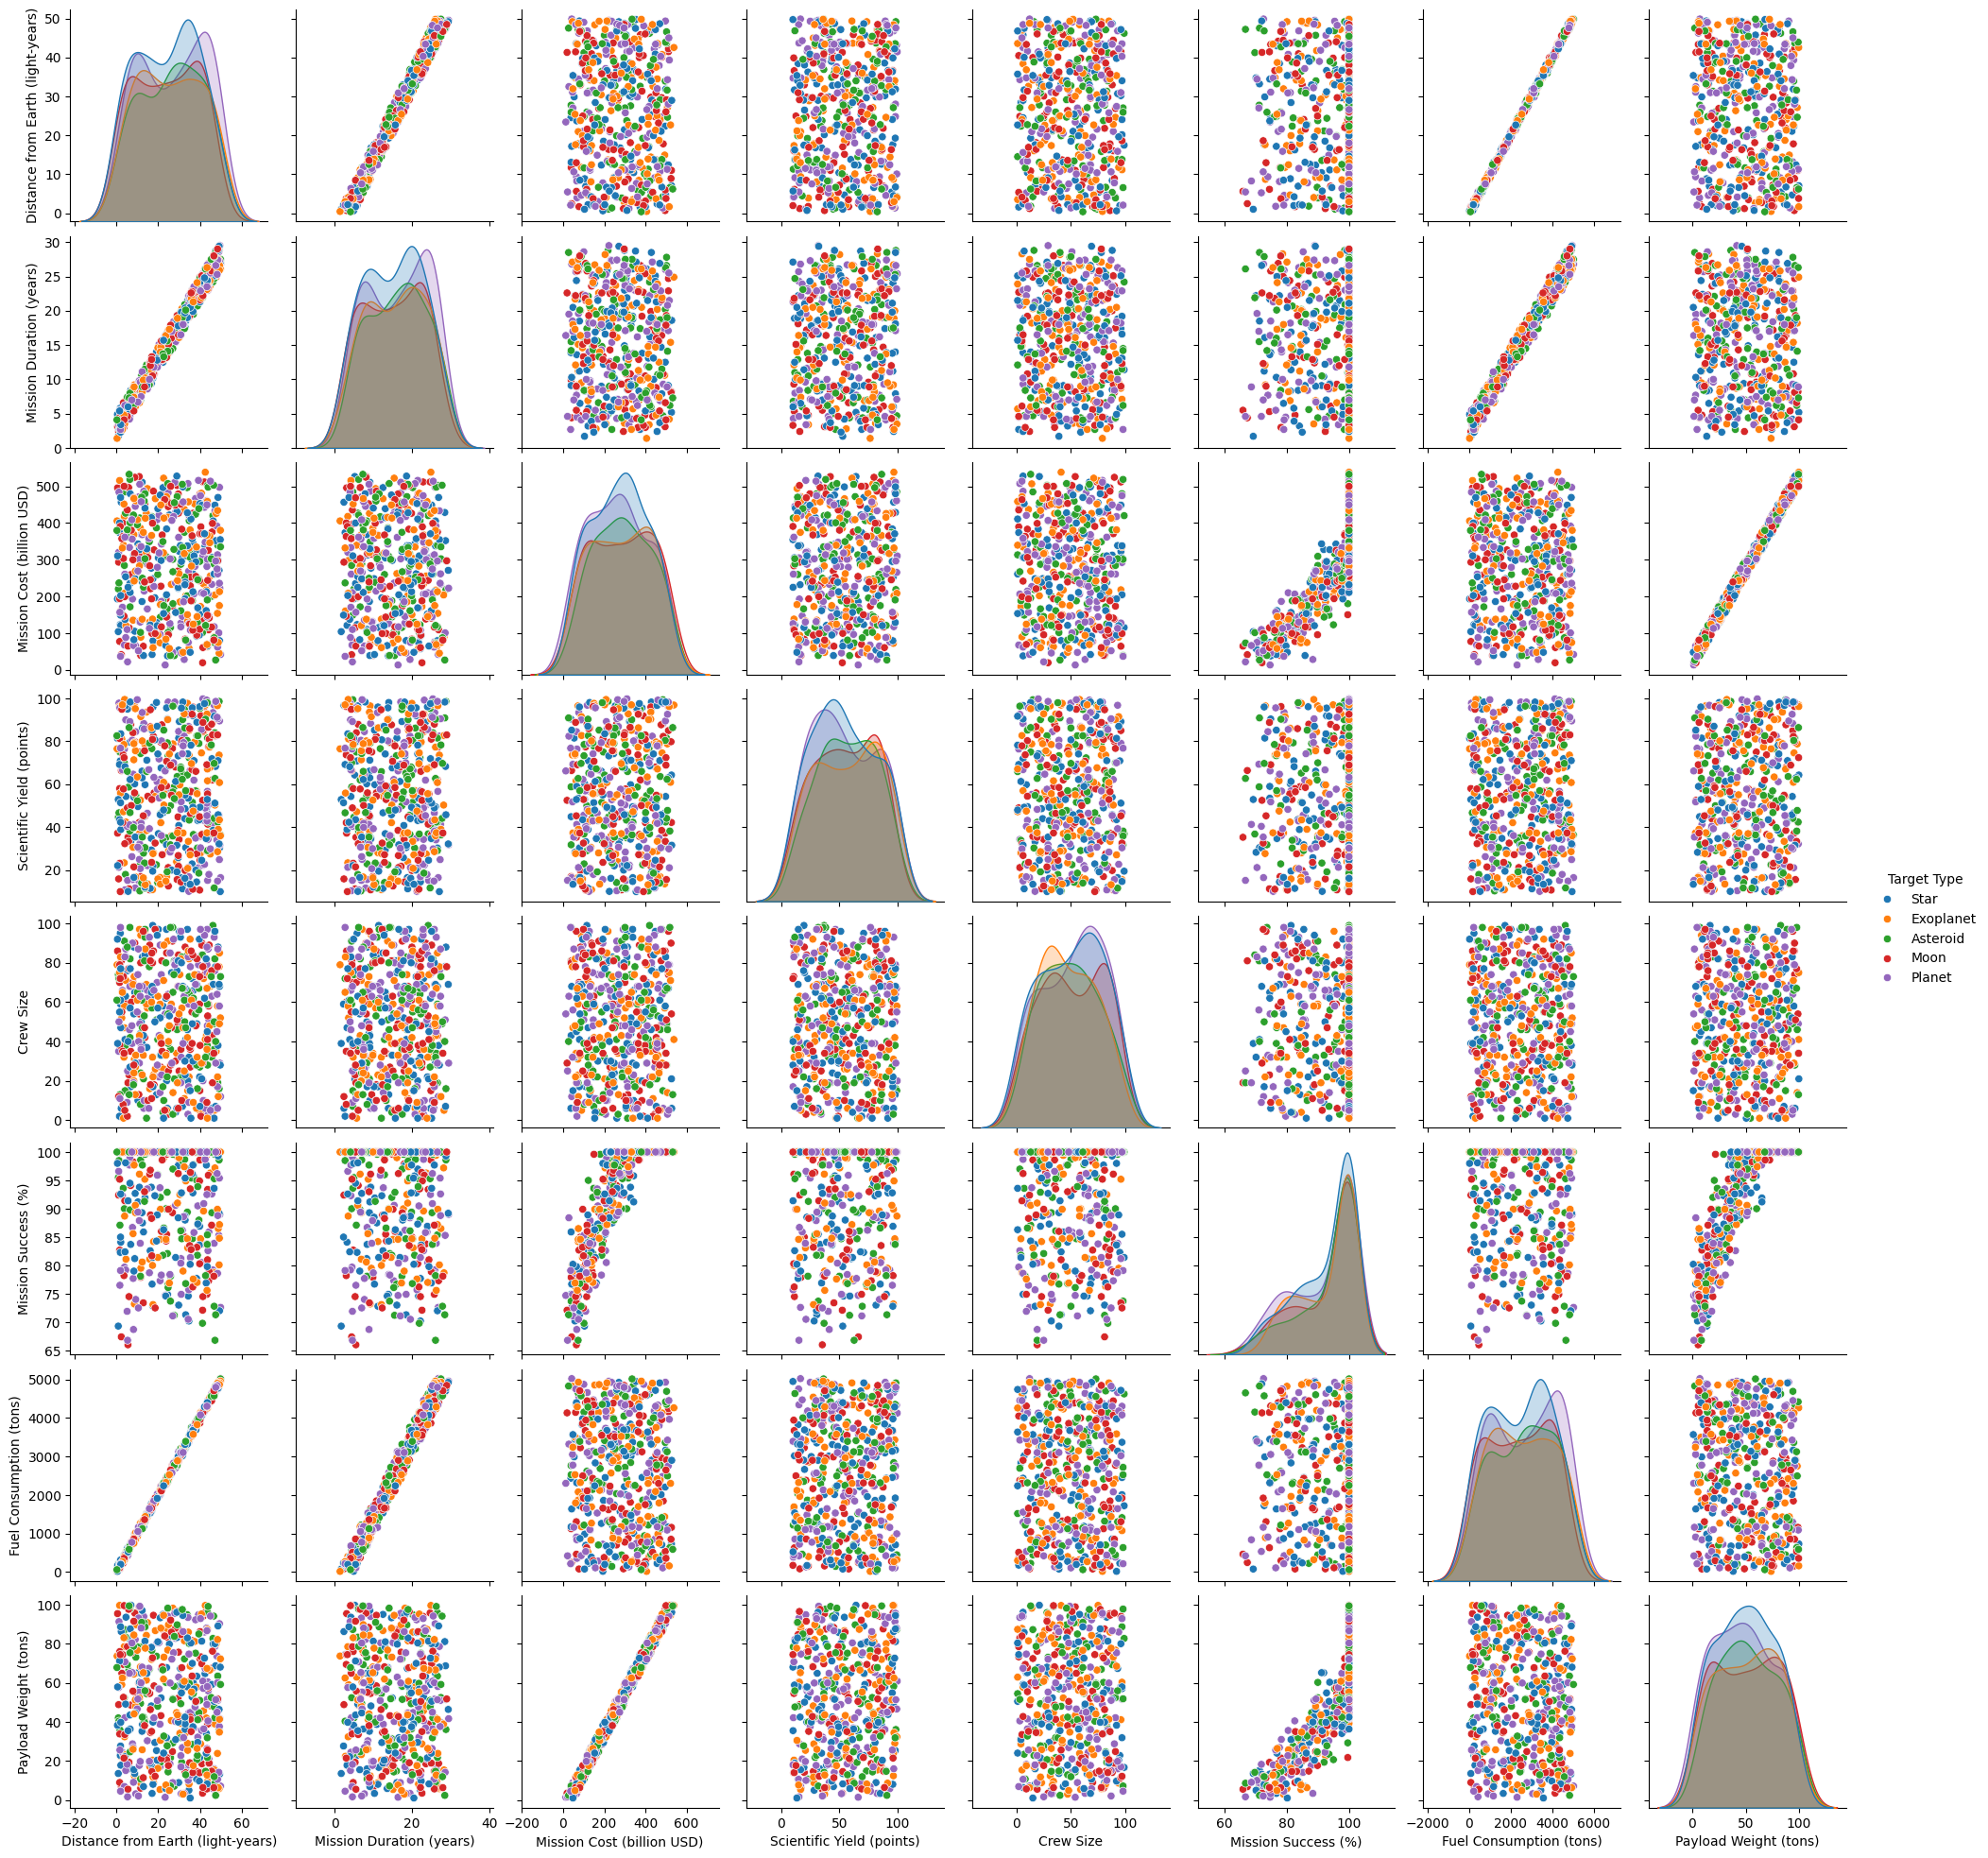

In [6]:
import seaborn as sns 
sns.pairplot(space_data, hue = 'Target Type')

Text(0, 0.5, 'Fuel Consumption (tons)')

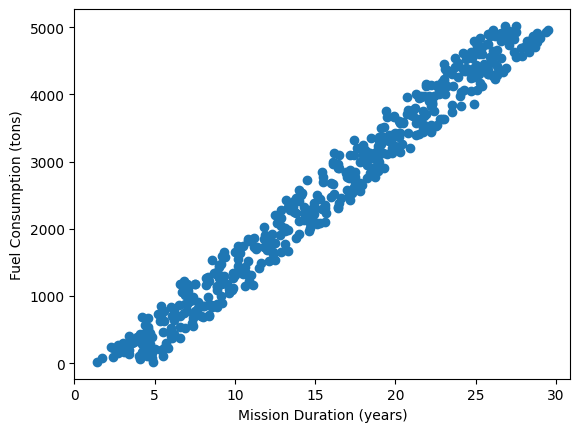

In [7]:
X_data= space_data['Mission Duration (years)'].values[:,np.newaxis]
Y_data=space_data['Fuel Consumption (tons)']
plt.scatter(X_data,Y_data)
plt.xlabel('Mission Duration (years)')
plt.ylabel('Fuel Consumption (tons)')

(400, 1) (400,) (100, 1) (100,)
361     708.60
73     3659.60
374    3547.01
155    2303.06
104     357.10
        ...   
347    4922.58
86      853.44
75     3225.82
438     876.63
15      159.52
Name: Fuel Consumption (tons), Length: 100, dtype: float64
[1019.57134096 3355.44303968 3803.15178193 2674.14712755  357.74102633
 4834.82844887 3686.358197   4698.56926644 5029.48442376  688.65618365
 3160.78706479 3297.04624721  863.84656105 3433.30542964 4367.65410912
  688.65618365 4406.5853041   396.67222131  766.5185736   416.1378188
 1428.34888824 2849.33750496 2265.36958028  649.72498867 3180.25266228
  279.87863637 4659.63807146 1700.86725309 2635.21593258  396.67222131
 2674.14712755 1778.72964305 4815.36285138 4562.31008402 5087.88121623
 2362.69756773  532.93140373  980.64014599 3024.52788236 3180.25266228
 2479.49115266 4659.63807146 4912.69083882 2674.14712755 1798.19524054
 4562.31008402  494.00020875 2498.95675015 2343.23197024 1097.43373092
 4620.70687648 1214.22731586 4756.9

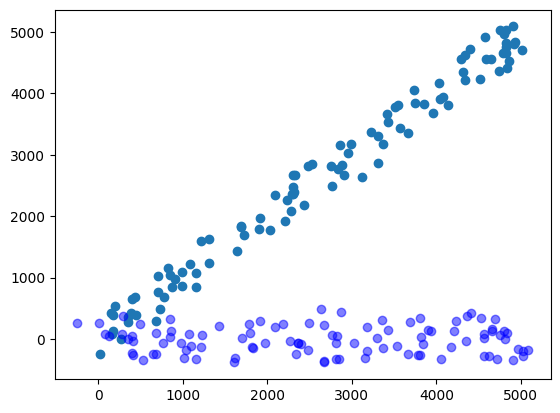

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#from torch import mode mode 
from sklearn.metrics import mean_squared_error,r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(Y_test)
print(Y_pred)
plt.scatter(Y_test,Y_pred)
#evaluating the model
mse = mean_squared_error(Y_test,Y_pred)#average squared difference between prediction and acutual value
r2 = r2_score(Y_test,Y_pred)#computes the varience, 1 is good, 0 is no correlation
print("Mean Squared Error:",mse)
print("R^2 Score:",r2)
residual_errors = Y_test-Y_pred
plt.scatter(Y_pred,residual_errors,alpha = 0.5, color='b')#should look like a random plot scattered around zero for the whole horizontal range


the average mission is 15.736799999999999 years long 
the standad deviation is 7.570733502111932

after scaling the mean is 1.5987211554602254e-16 
the scaled standad deviation is 0.9999999999999999


epoch 0: loss=7431965.3083, m=101.3731, c=202.3435
epoch 1000: loss=1051953.0521, m=968.7090, c=1682.6815
epoch 2000: loss=189375.8711, m=1287.6244, c=2226.9950
epoch 3000: loss=72755.5005, m=1404.8882, c=2427.1365
epoch 4000: loss=56988.4351, m=1448.0055, c=2500.7277
epoch 5000: loss=54856.7291, m=1463.8596, c=2527.7868
epoch 6000: loss=54568.5226, m=1469.6890, c=2537.7363
epoch 7000: loss=54529.5571, m=1471.8325, c=2541.3947
epoch 8000: loss=54524.2890, m=1472.6206, c=2542.7399
epoch 9000: loss=54523.5767, m=1472.9104, c=2543.2345
epoch 10000: loss=54523.4804, m=1473.0170, c=2543.4164
epoch 11000: loss=54523.4674, m=1473.0562, c=2543.4833
epoch 12000: loss=54523.4656, m=1473.0706, c=2543.5078
epoch 13000: loss=54523.4654, m=1473.0759, c=2543.5169
epoch 14000: loss=54523.4654, m=1473.07

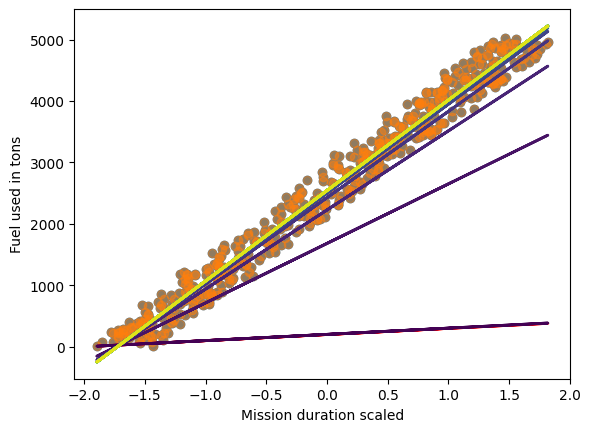

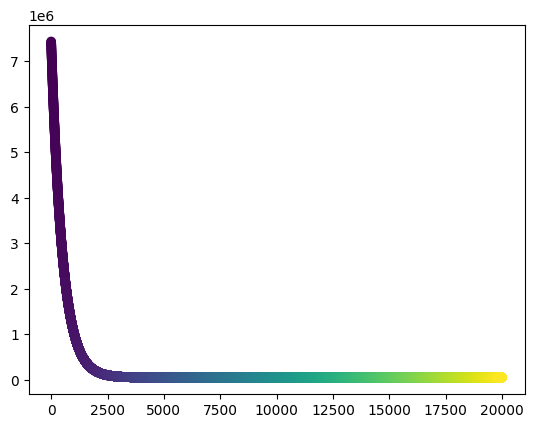

Mean Squared Error: 54523.46535193043
R^2 Score: 0.9754893993820449


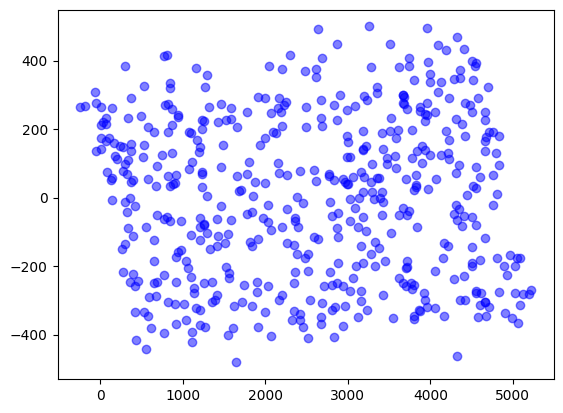

In [32]:
#grad decent
from sklearn.preprocessing import StandardScaler
cmap= plt.cm.viridis
X_example = space_data['Mission Duration (years)'].values[:,np.newaxis]
Y_example = space_data['Fuel Consumption (tons)'].values
print('\nthe average mission is', np.mean(X_example), 'years long', '\nthe standad deviation is', np.std(X_example))
scaler = StandardScaler()
X_example = scaler.fit_transform(X_example)
print('\nafter scaling the mean is', np.mean(X_example),'\nthe scaled standad deviation is', np.std(X_example))
print("\n")
plt.scatter(X_example,Y_example)
plt.xlabel("Mission duration scaled")#from 0 at centre to +- a standard deviation above or below for extra long missions or short missions
plt.ylabel("Fuel used in tons")

m,c = 100,200 #initial guesses for the grad and y intercept
L=0.0005 #learning rate is how big a step we take down the gradient each iteration
epochs = 20000 #number of iterations

norm = matplotlib.colors.Normalize(vmin=0,vmax=epochs)
loss_history=[]
epoch_history=[]
plt.scatter(X_example,Y_example,alpha=0.5,label="observations")
plt.plot(X_example,m*X_example.flatten() + c,color='r',linewidth=2,label=f"Start")
for i in range(epochs):
    Y_pred = m*X_example.flatten()+c 
    error = Y_pred - Y_example
    loss = (error**2).mean() #mean squared error
    loss_history.append(loss)
    epoch_history.append(i)
    m_grad = (2/len(X_example))*np.dot(error,X_example.flatten()) #gradient wrt m
    c_grad = (2/len(X_example))*error.sum() #gradient wrt c
    m = m - L*m_grad #update m
    c = c - L*c_grad #update c

    if i % 1000 == 0:
        print(f"epoch {i}: loss={loss:.4f}, m={m:.4f}, c={c:.4f}")
        plt.plot(X_example,m*X_example.flatten() + c,color=cmap(norm(i)),linewidth=2,label=f"epoch {i}")

print("\nFinal paramters:")
print(f"grad slope={m:.4f}, y intercept c={c:.4f}")
plt.show()

plt.figure()
plt.scatter(epoch_history, loss_history,color=cmap(norm(epoch_history)) )
plt.show()
mse = mean_squared_error(Y_example,m*X_example.flatten()+c)#average squared difference between prediction and acutual value
r2 = r2_score(Y_example,m*X_example.flatten()+c)#computes the varience, 1 is good, 0 is no correlation
print("Mean Squared Error:",mse)
print("R^2 Score:",r2)
residual_errors = Y_example-(m*X_example.flatten()+c)
plt.scatter(m*X_example.flatten()+c,residual_errors,alpha = 0.5, color='b')#should look like a random plot scattered around zero for the whole horizontal range 